In [1]:
from main import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# interaction check isnt working

In [20]:
cell = Cell(1, permanent_genes=2)

# mutate cell
for _ in range(0, 3):
    _, cell = cell.divide(2)
    


switched to vode solver


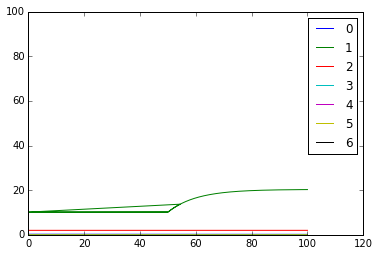

In [28]:
disturbances = [(0, 1), (50, 2), (100, 1)]

steady_states = cell.get_steady_states(input_node=2, input_magnitude=1, ic=None)

times, states, energy = cell.simulate(disturbances, input_node=2, ic=steady_states, retall=True)

for i, state in enumerate(states):
    plt.plot(times, state, label=i)
    
ax = plt.gca()
ax.set_ylim(0, 100)
ax.legend(loc=0)

In [29]:
print(cell.key)

{0: 0, 1: 3, 2: 1, 3: 4, 4: 5, 5: 2, 6: 6}


True

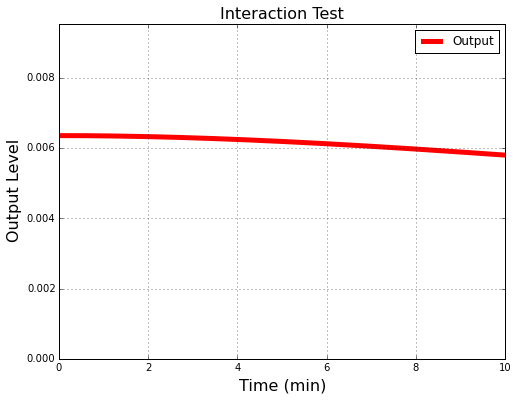

In [30]:
cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)

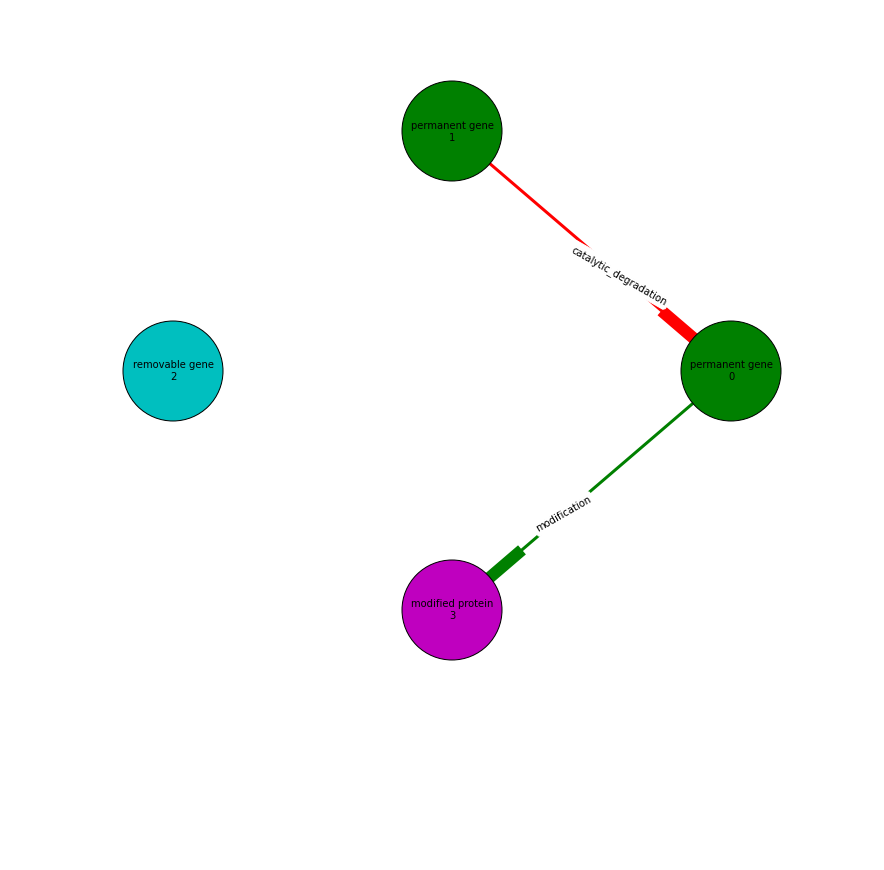

In [21]:
cell.add_transcriptional_regulation(tf=3, gene=0)
cell.show_topology()

In [66]:
t = np.arange(0, 10)
f = np.array([5 for _ in t])


cum = scipy.integrate.cumtrapz(f, x=t)

print(cum)

[  5.  10.  15.  20.  25.  30.  35.  40.  45.]


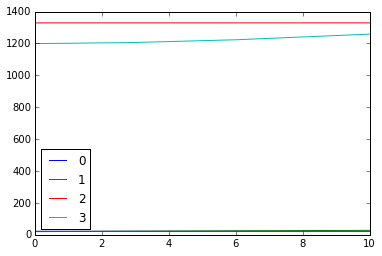

In [62]:
step_input = [(0, 2), (10, 2)]
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1, ic=None)
times, states, _ = cell.simulate(step_input, input_node=2, ic=steady_states, retall=True)

for i, state in enumerate(states):
    plt.plot(times, state, label=i)
    
plt.legend(loc=0)

In [68]:
rxn_rates = np.empty((len(cell.reactions), len(times)))
for i, t in enumerate(times):
    rxn_rates[:, i] = cell.get_rxn_rates(t, states[:, i], step_input, 2)

In [70]:
rxn_rates[0]

array([ 1.10769231,  1.10769242,  1.10770561,  1.10811162,  1.10933249,
        1.11168125])

In [67]:
for rxn in cell.reactions:
    print(rxn.rxn_type, rxn.reactants, rxn.products)
    
for mod in cell.rate_mods:
    print(mod.mod_type, mod.substrate, mod.target)

transcription [] [0]
mrna_decay [0] []
translation [0] [1]
protein_decay [1] []
transcription [] [2]
mrna_decay [2] []
translation [2] [3]
protein_decay [3] []
activation 3 0


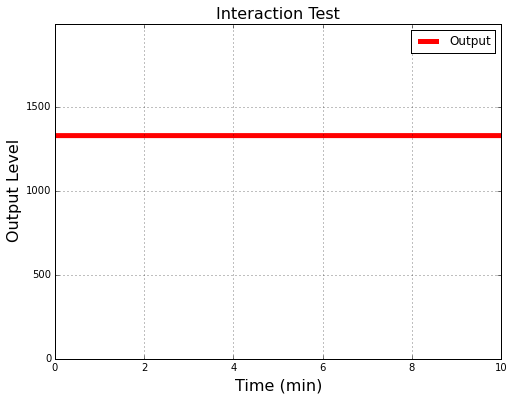

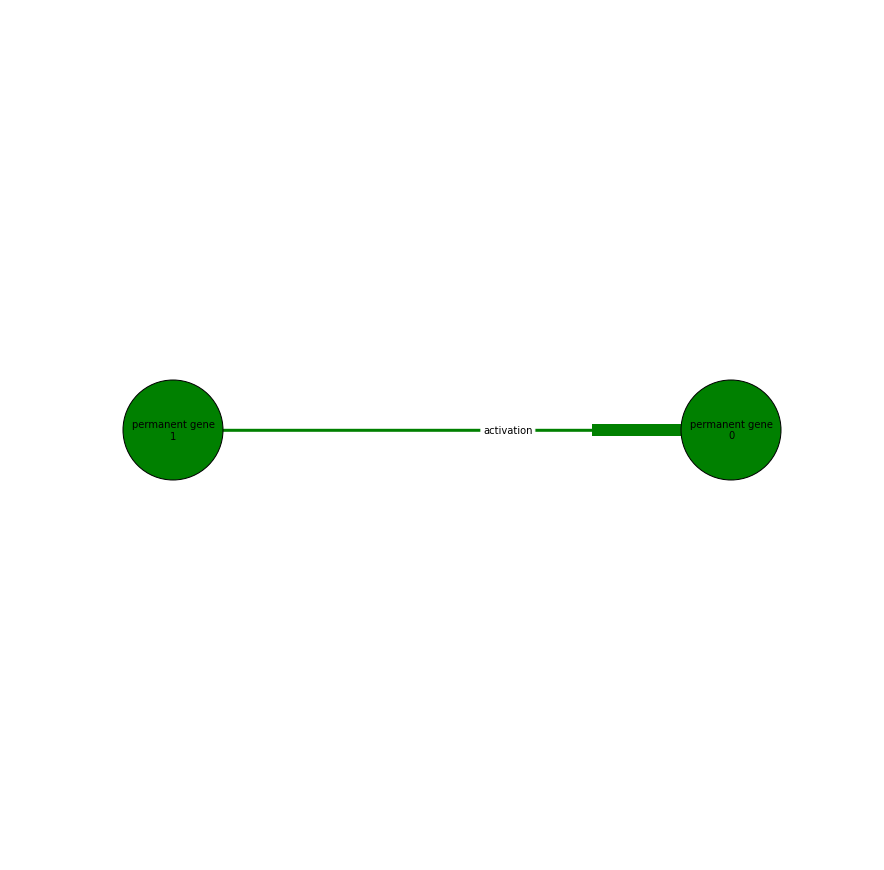

In [64]:
cell = Cell(1, permanent_genes=2)
cell.add_transcriptional_regulation(tf=3, gene=0, mod_type='activation')

cell.interaction_check_numerical(input_node=2, output_node=1, plot=True)

cell.show_topology()

In [18]:
population, score_evolution = run_simulation(generations=50, population_size=50, mutations_per_division=2, retall=True)

[    0.    20.     0.  1200.     0.     0.]
[ 0.  0.  0.  0.  0.  0.]
0.0


RuntimeWarning: invalid value encountered in double_scalars

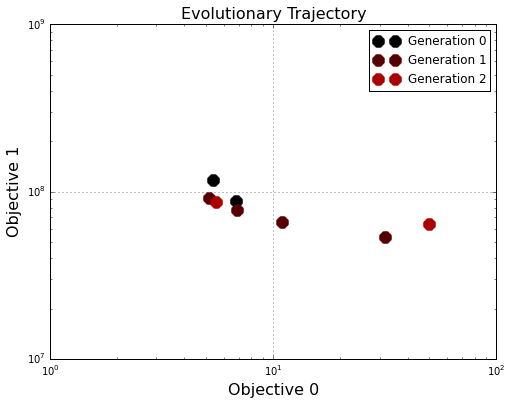

In [8]:
plot_2D_trajectory(score_evolution, obj=(0, 1))

switched to vode solver


[7.0089113269258387, 100829372.32661223]

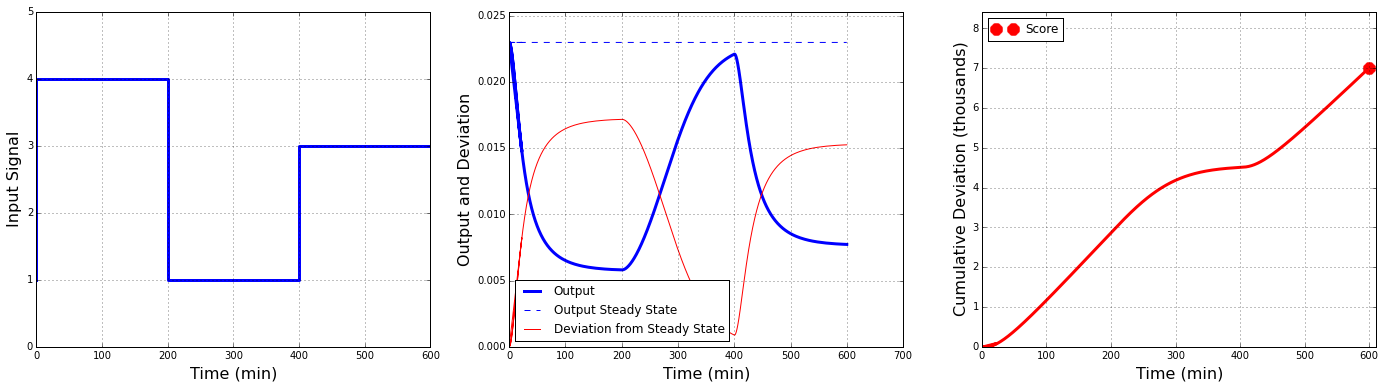

In [13]:
get_fitness(population[0], input_node=2, output_node=1, plot=True)